In [33]:
import requests
from bs4 import BeautifulSoup  
import pandas as pd
import matplotlib as plt

In [2]:
website_url = 'https://countrymusichalloffame.org/hall-of-fame/members/'
df_list = []
# soup = BeautifulSoup(response.content, 'lxml')
def step1(link):
    response = requests.get(link)
    if response.status_code == 200:
        print('Good!')
    else:
        print("Not good")
    return response

In [3]:
def step2(response, x): # x is really a placeholder for link
    response = requests.get(x)
    soup = BeautifulSoup(response.content, 'lxml')
#     print(soup.h3)
    artist_names = soup.find_all('h3')
    return artist_names

In [4]:
def step3(raw): # will contain artist_names

    artist_names_str_list = []
    artist_names_list = list(raw)
    for name in artist_names_list:
#         print(name)
        name = str(name.string)
        name = name.replace('<h3>',"")
        name = name.replace('</h3>',"")
        artist_names_str_list.append(name)
    return artist_names_str_list

In [5]:
def step4(x): # again, x is a placeholder for link
    response = requests.get(x)
    soup = BeautifulSoup(response.content, 'lxml')
    year_list=[]
    for inductee_year in soup.find_all('div', class_ = 'vertical-card_content--copy'):
        year = inductee_year.p.text.replace('Inducted', '').strip()
        year_list.append(year) #year_list is the useful thing here)
    return year_list

In [6]:
def step5(artist_names_str_list, year_list):
    df = pd.DataFrame(list(zip(artist_names_str_list, year_list)),
                   columns =['Artist', 'Year_Inducted'])
    return df

In [7]:
lst = ['https://countrymusichalloffame.org/hall-of-fame/members/']
def create_df(link):
    response = requests.get(link)
    soup = BeautifulSoup(response.content, 'lxml')
    stuff = step1(link)
    artist_names = step2(stuff, link)
    artist_names_str_list = step3(artist_names)
    year_list = step4(link)
    df = step5(artist_names_str_list, year_list)
    df_list.append(df)
    return df_list

In [8]:
lst

['https://countrymusichalloffame.org/hall-of-fame/members/']

In [9]:
##### TEST ONLY - DELETE WHEN DETERMINE THAT create_df RETURNS A DATAFRAME #####
# test = create_df('https://countrymusichalloffame.org/hall-of-fame/members/page/16')
# # test.reset_index()
# print(type(test[0]))
# test

In [10]:
n_site = range(2,17)

for num in n_site:
    web_url = str(f'https://countrymusichalloffame.org/hall-of-fame/members/page/{num}')
    lst.append(web_url)

In [11]:
df_list

[]

In [12]:
df_list = []
counter = 0
for link in lst:
    print(link[-2:])
    df = create_df(link)[counter]
    print(type(df)) # df is <class 'list'>
########################## My problem now is that I'm making a list of lists of dfs. What I really want is a list of dfs.
    print("x")
    df_list.append(df)
#     print(df[-1]) ####this is a list of dfs, not a df.
    print("y")
    counter += 1
    print(counter)

s/
Good!
<class 'pandas.core.frame.DataFrame'>
x
y
1
/2
Good!
<class 'pandas.core.frame.DataFrame'>
x
y
2
/3
Good!
<class 'pandas.core.frame.DataFrame'>
x
y
3
/4
Good!
<class 'pandas.core.frame.DataFrame'>
x
y
4
/5
Good!
<class 'pandas.core.frame.DataFrame'>
x
y
5
/6
Good!
<class 'pandas.core.frame.DataFrame'>
x
y
6
/7
Good!
<class 'pandas.core.frame.DataFrame'>
x
y
7
/8
Good!
<class 'pandas.core.frame.DataFrame'>
x
y
8
/9
Good!
<class 'pandas.core.frame.DataFrame'>
x
y
9
10
Good!
<class 'pandas.core.frame.DataFrame'>
x
y
10
11
Good!
<class 'pandas.core.frame.DataFrame'>
x
y
11
12
Good!
<class 'pandas.core.frame.DataFrame'>
x
y
12
13
Good!
<class 'pandas.core.frame.DataFrame'>
x
y
13
14
Good!
<class 'pandas.core.frame.DataFrame'>
x
y
14
15
Good!
<class 'pandas.core.frame.DataFrame'>
x
y
15
16
Good!
<class 'pandas.core.frame.DataFrame'>
x
y
16


In [13]:
df_list

[          Artist Year_Inducted
 0      Roy Acuff          1962
 1        Alabama          2005
 2  Bill Anderson          2001
 3    Eddy Arnold          1966
 4    Chet Atkins          1973
 5     Gene Autry          1969
 6  DeFord Bailey          2005
 7     Bobby Bare          2013
 8    Johnny Bond          1999,
           Artist Year_Inducted
 0      Roy Acuff          1962
 1        Alabama          2005
 2  Bill Anderson          2001
 3    Eddy Arnold          1966
 4    Chet Atkins          1973
 5     Gene Autry          1969
 6  DeFord Bailey          2005
 7     Bobby Bare          2013
 8    Johnny Bond          1999,
                         Artist Year_Inducted
 0               Bobby Braddock          2011
 1               Harold Bradley          2006
 2                Jerry Bradley          2019
 3                 Owen Bradley          1974
 4                Rod Brasfield          1987
 5                 Garth Brooks          2012
 6                Brooks & Dunn     

In [14]:
result = pd.concat(df_list)
result

,Artist,Year_Inducted
0,Roy Acuff,1962
1,Alabama,2005
2,Bill Anderson,2001
3,Eddy Arnold,1966
4,Chet Atkins,1973
...,...,...
4,Chet Atkins,1973
5,Gene Autry,1969
6,DeFord Bailey,2005
7,Bobby Bare,2013


In [17]:
result = result.drop_duplicates()
result.reset_index(drop=True)

,Artist,Year_Inducted
0,Roy Acuff,1962
1,Alabama,2005
2,Bill Anderson,2001
3,Eddy Arnold,1966
4,Chet Atkins,1973
...,...,...
135,Hank Williams,1961
136,Bob Wills,1968
137,Mac Wiseman,2014
138,Tammy Wynette,1998


In [37]:
year_freq = result.Year_Inducted.value_counts()
year_freq.sort_values(ascending=True, inplace=True)

<AxesSubplot:>

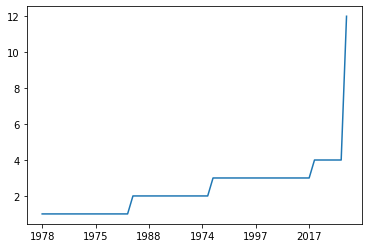

In [40]:
year_freq.plot()